# Practical Application Assignment 11.1 

What drives the price of a car ?


In [92]:
# import all the necessary libraries from pandas, sklearn, and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from scipy.special import exp10
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor


from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.linear_model import LogisticRegression, LinearRegression , Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
from sklearn.inspection import permutation_importance
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


In [93]:
# 1. Read in the vehicles.csv file.
df=pd.read_csv('/Practical_Application_11.1/vehicles.csv')

In [94]:
# make sure to see all the columns
pd.set_option('display.max_columns', None)

In [95]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [96]:
# 2. Investigate the dataset for missing or problematic data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [97]:
#Check columns for missing/null values
missing_vals = df.isnull().sum()
missing_vals

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [98]:
#Dataset seem to have over 100,000 null values for condition, cylinders, VIN, drive, size, paint_color 

<AxesSubplot:>

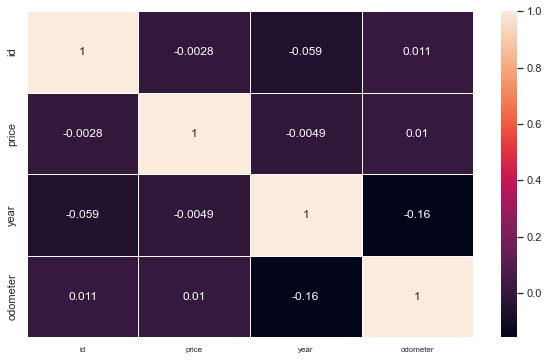

In [99]:
# 3. Doing a heatmap to check if there are any correlations with the numerical data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidth=1)

In [100]:
#Dataset has mostly categorical values and few numerical values. 
#Not much correlation exist except that price do seem to decrease with age of car. 

Text(0, 0.5, 'Year of Manufacture')

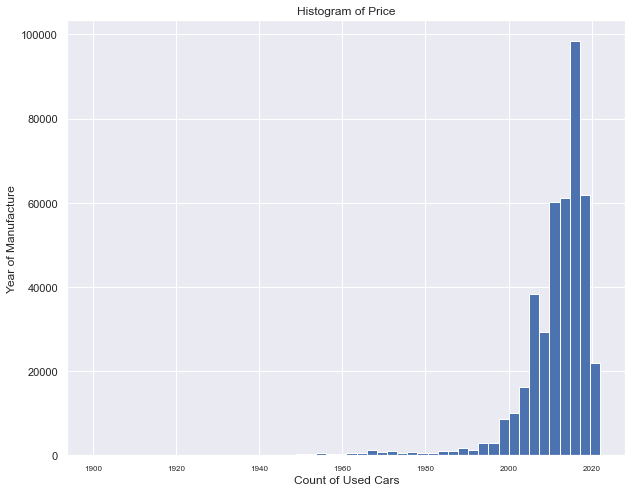

In [101]:
# Plotting the histogram distribution of used cars by year.  
plt.figure(figsize=(10,8))
df["year"].hist(bins=50)
plt.title('Histogram of Price')
plt.xlabel('Count of Used Cars')
plt.ylabel('Year of Manufacture')

In [102]:
# Seems most of the cars are between 1990 to 2020. Cars before that year may be considered as outliers
# We could consider removing them from the dataset
# 4. Exploriing the dataset for unique categorical values
u = df.nunique(axis=0)
print("Count of unique values in each column :\n",u)

Count of unique values in each column :
 id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


In [103]:
# Categorical values of region, year, model, condition, cylinders, drive, size, type, paint_color, state
# would be important to influence the price of car.
# However, VIN, id do not quite influence the price.

# Exploratory Data Analysis

In [104]:
#checking the value counts for the following categorical values and replacing missing values with unique values
# having highest count (median)
df['condition'].value_counts()



good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [105]:
# Based on the above, where there is missing values for 'condition', assume its 'good' condition
df['fuel'].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [106]:
# Based on the above, where there is missing values for 'fuel', assume its 'gas'

df['title_status'].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [107]:
# Based on the above, where there is missing values for 'title', assume its 'clean' 

df['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [108]:
# Based on the above, where there is missing values for 'transmission', assume its 'automatic' 

df['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [109]:
# Since 'type' is likely to be an important price determinant, 
# Where there are missing values, remove those records  

df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [110]:
# Since 'cylinders' is likely to be an important price determinant, 
# Where there are missing values, remove those records  

df['drive'].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [111]:
# Since 'drive' is likely to be an important price determinant, 
# Where there are missing values, remove those records 

df['size'].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

<AxesSubplot:title={'center':'Price of used cars by type'}, xlabel='type', ylabel='price'>

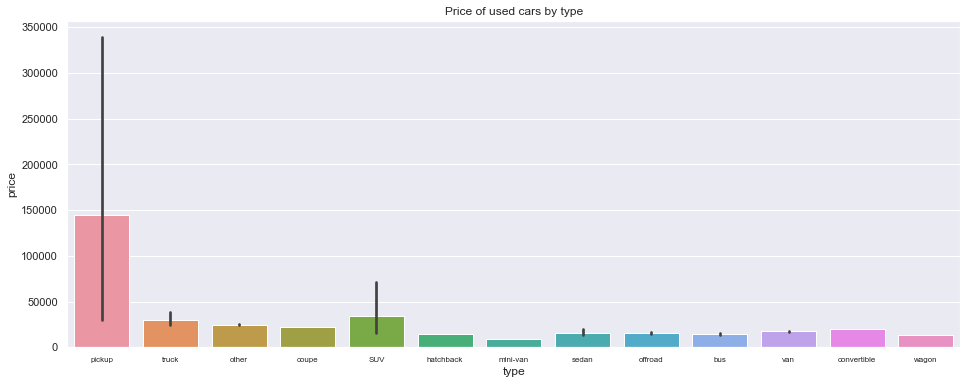

In [112]:
# Since 'size' is likely to be an important price determinant, 
# Where there are missing values, remove those records 

#Analyzing the influence on price of cars against the above variables
plt.figure(figsize=(16,6))
plt.title('Price of used cars by type')
sns.set(rc={'axes.grid': True,'xtick.labelsize':8})
sns.barplot(df['type'],df["price"])

<AxesSubplot:title={'center':'Price of used cars by drive'}, xlabel='drive', ylabel='price'>

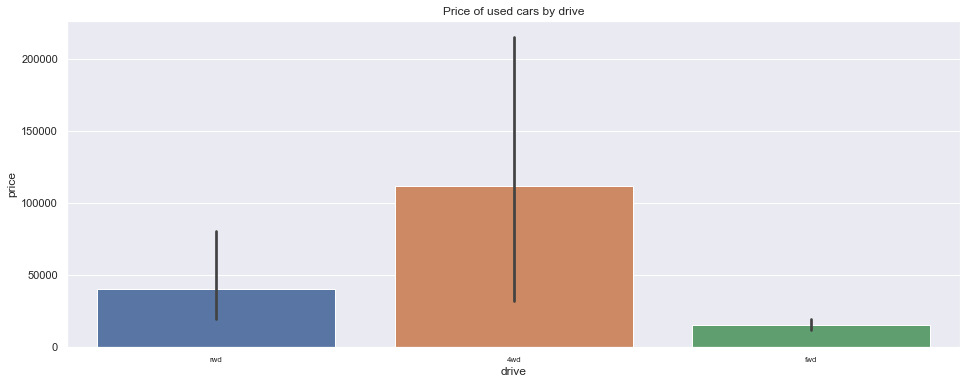

In [113]:
# Clearly pickup, SUV and truck had the highest price point and variance

# Analyzing the price of cars by drive
plt.figure(figsize=(16,6))
plt.title('Price of used cars by drive')
sns.set(rc={'axes.grid': True,'xtick.labelsize':8})
sns.barplot(df['drive'],df["price"])

<AxesSubplot:title={'center':'Price of used cars by cylinders'}, xlabel='cylinders', ylabel='price'>

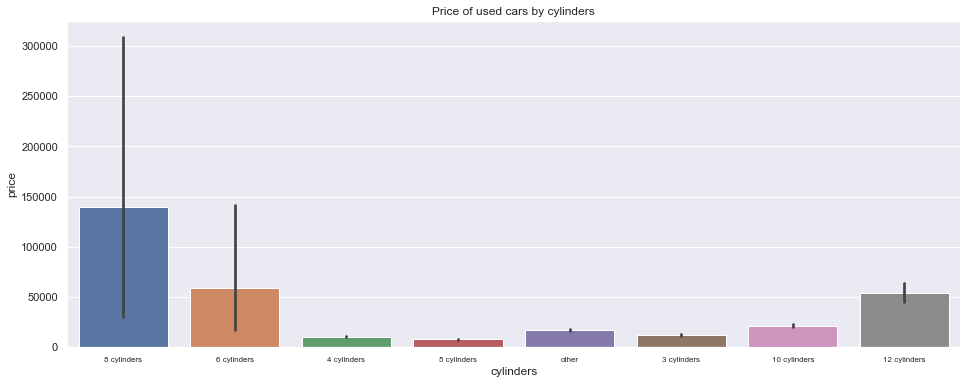

In [114]:
# Clearly 4wd had the highest price point and variance

# Analyzing the price of cars by drive
plt.figure(figsize=(16,6))
plt.title('Price of used cars by cylinders')
sns.set(rc={'axes.grid': True,'xtick.labelsize':8})
sns.barplot(df['cylinders'],df["price"])

Text(0.5, 1.0, 'Count of cars by manufacturer')

<Figure size 1440x720 with 0 Axes>

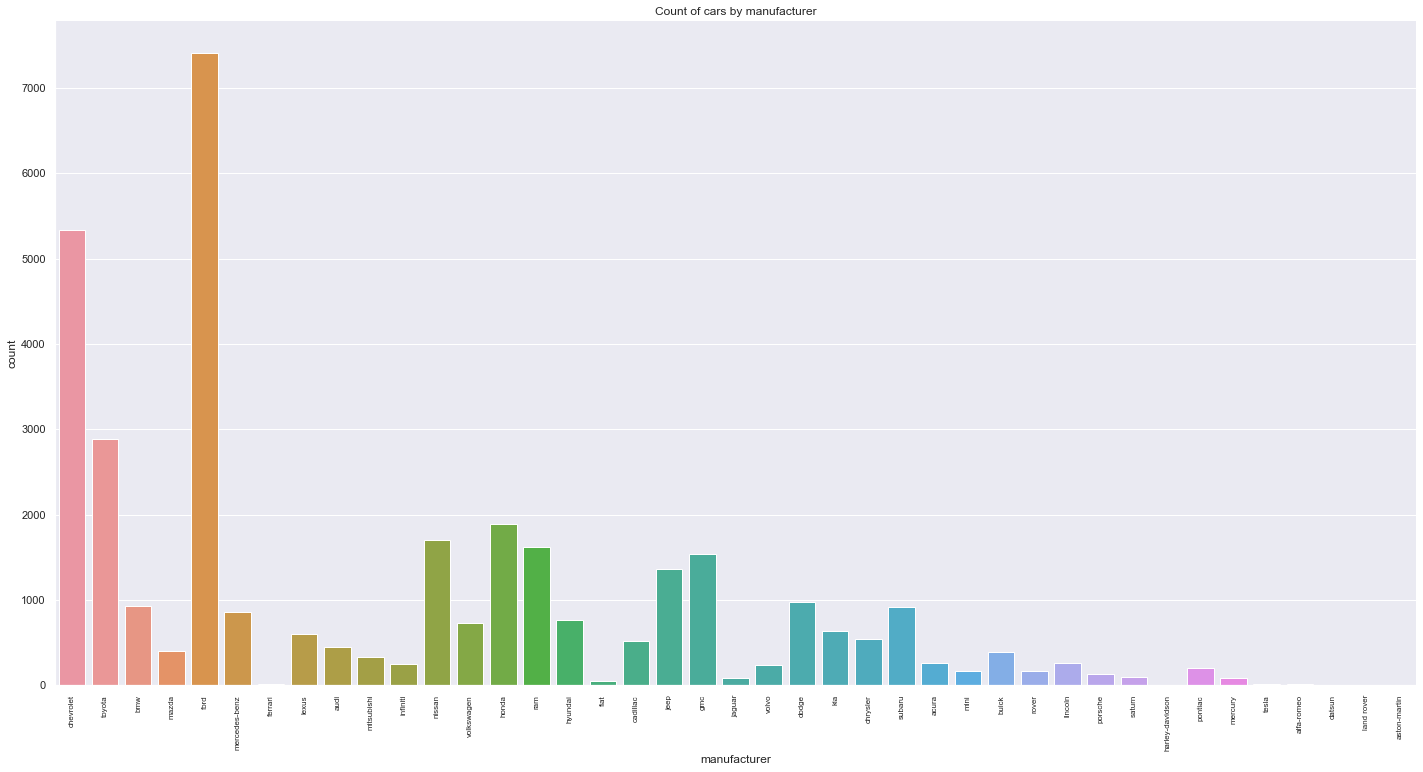

In [115]:
# Clearly 3 cylinders had the highest price point followed by 6 and 12 cylinders respectively

# Analyzing the bar plot by manufacturer cars.

plt.figure(figsize=(20, 10))
sns.catplot(x="manufacturer", kind="count", height=10, aspect=2, data=df.dropna())
plt.xticks(rotation=90)
plt.title('Count of cars by manufacturer')

<AxesSubplot:title={'center':'Price of used cars by size'}, xlabel='size', ylabel='price'>

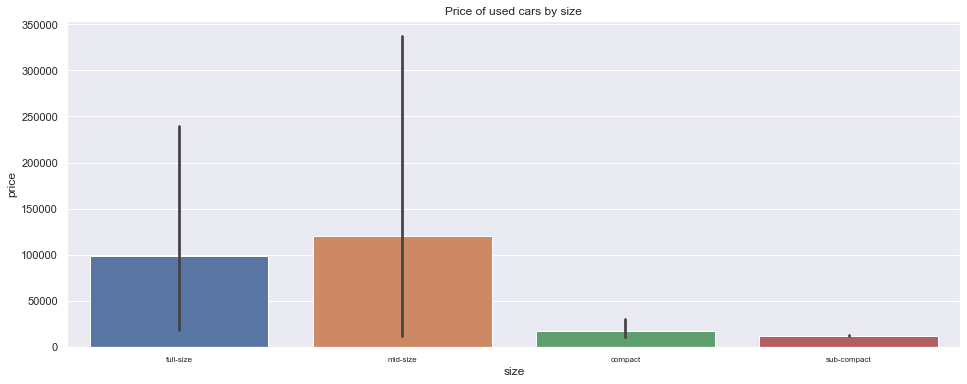

In [116]:
# Clearly Ford, Chevrolet, Toyota are among the top 3 manufacturers by count. 
# So, manufacturer name in determining the price
# So, where there are missing values of 'manufacturers', remove those records  

# Analyzing the price of cars by drive
plt.figure(figsize=(16,6))
plt.title('Price of used cars by size')
sns.set(rc={'axes.grid': True,'xtick.labelsize':8})
sns.barplot(df['size'],df["price"])


In [117]:
# Clearly full-size and mid-size used cars have the highest price points
# However, there are large number of records with missing values. 
# So we will be better off dropping that field

# take a random sample from dataset and make a plot
used_car = df[['price', 'year', 'state']]
used_car_sample = used_car.sample(n = 1000, random_state = 1)
used_car_sample.head()

,price,year,state
154871,7500,2012.0,in
406469,25999,2019.0,wa
252241,22645,2014.0,nj
29757,0,2015.0,ca
47657,21997,2007.0,ca


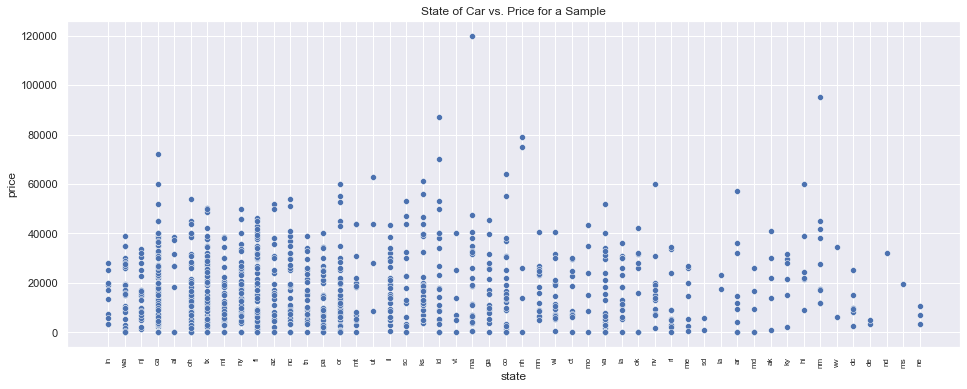

In [118]:
# Scatter plot to check the price of car vs state
plt.figure(figsize=(16,6))
sns.scatterplot(x = 'state', y = 'price', data = used_car_sample)
plt.title("State of Car vs. Price for a Sample")
plt.xticks(rotation=90)
plt.show()

In [119]:
# There is not much relevance of car price on state. Hence, this categorical feature may be dropped.



# Data Preparation

In [120]:
# Based on the above analysis, see columns may be dropped as they do not seem to have much relevance to price of car or contain null values
#drop the following columns
df_clean = df
df_clean.drop(columns = ['id', 'VIN', 'size', 'region', 'state'], inplace = True )

In [121]:
#drop nan values for manufacturer
df_clean['manufacturer'].dropna(inplace = True)

#drop nan values for cylinders
df_clean['cylinders'].dropna(inplace = True)

#drop nan values for drive
df_clean['drive'].dropna(inplace = True)

In [122]:
#removing outliers - consider years from 1995 to 2023, odometer reading between 500 to 150000 
# and price of cars between 1000 to 100000
df_clean = df.query(' \
    ( 1995 < year < 2023 ) & \
    ( 500 < odometer < 150000 ) & \
    ( 1000 < price < 100000 ) & \
    title_status != "parts only" \
')

In [123]:
df_clean['year'].fillna(df_clean['year'].median(), inplace = True)
df_clean['fuel'].fillna(df_clean['fuel'].value_counts().index[0], inplace = True)
df_clean['odometer'].fillna(df_clean['odometer'].mean(), inplace = True)
df_clean['paint_color'].fillna(df_clean['paint_color'].value_counts().index[0], inplace = True)
df_clean = df_clean[df_clean['type'].notna()]
df_clean.info()

/var/folders/nt/f2pzr76s5p1bl2kw5bl9s9w40000gn/T/ipykernel_2366/4167696957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'].fillna(df_clean['year'].median(), inplace = True)
/var/folders/nt/f2pzr76s5p1bl2kw5bl9s9w40000gn/T/ipykernel_2366/4167696957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['fuel'].fillna(df_clean['fuel'].value_counts().index[0], inplace = True)
/var/folders/nt/f2pzr76s5p1bl2kw5bl9s9w40000gn/T/ipykernel_2366/4167696957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234960 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         234960 non-null  int64  
 1   year          234960 non-null  float64
 2   manufacturer  229394 non-null  object 
 3   model         233725 non-null  object 
 4   condition     159069 non-null  object 
 5   cylinders     148082 non-null  object 
 6   fuel          234960 non-null  object 
 7   odometer      234960 non-null  float64
 8   title_status  230553 non-null  object 
 9   transmission  233794 non-null  object 
 10  drive         181284 non-null  object 
 11  type          234960 non-null  object 
 12  paint_color   234960 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 25.1+ MB


In [124]:
df_clean['condition'].fillna('good', inplace = True)
df_clean['fuel'].fillna('gas', inplace = True)
df_clean['transmission'].fillna('automatic', inplace = True)
df_clean['title_status'].fillna('clean', inplace = True)

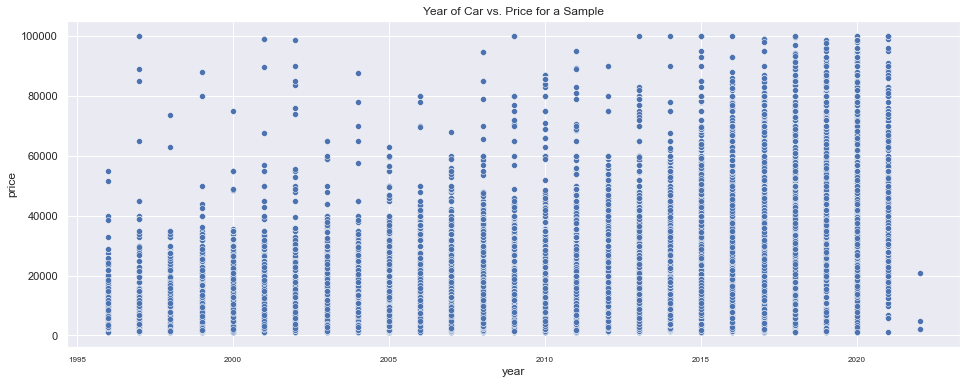

In [125]:
#Plot of year of car with price
plt.figure(figsize=(16,6))
sns.scatterplot(x = 'year', y = 'price', data = df_clean)
plt.title("Year of Car vs. Price for a Sample")
plt.show()

In [126]:
# Creating a new column age from Year column, assuming the current year is 2023
df_clean['age']=(2023 - df_clean.dropna()['year']).astype(int)

In [127]:
# Converting cylinders to numeric field
df_clean['cylinders'] = df_clean['cylinders'].dropna().str.replace('other','1').replace('12 cylinders','12').replace('10 cylinders','10').replace('3 cylinders','3').replace('5 cylinders','5').replace('4 cylinders','4').replace('6 cylinders','6').replace('8 cylinders','8').astype(int)

In [129]:
df_clean.drop(columns = ['year'], inplace = True )

df_clean.corr()

,price,cylinders,odometer,age
price,1.000000,0.442147,-0.551838,-0.555947
cylinders,0.442147,1.000000,-0.047874,0.105761
odometer,-0.551838,-0.047874,1.000000,0.570552
age,-0.555947,0.105761,0.570552,1.000000


In [130]:
# The above shows that odometer and price are negatively correlated
# Cylinders and price are positively correlated
# Age and price are negatively correlated
# Age and odometer are postively correlated

In [131]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234960 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         234960 non-null  int64  
 1   manufacturer  229394 non-null  object 
 2   model         233725 non-null  object 
 3   condition     234960 non-null  object 
 4   cylinders     148082 non-null  float64
 5   fuel          234960 non-null  object 
 6   odometer      234960 non-null  float64
 7   title_status  234960 non-null  object 
 8   transmission  234960 non-null  object 
 9   drive         181284 non-null  object 
 10  type          234960 non-null  object 
 11  paint_color   234960 non-null  object 
 12  age           122323 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 25.1+ MB


In [132]:
## From above we can drop nan values from columns which do not have a value
df_model=df_clean.dropna()

In [133]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122323 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         122323 non-null  int64  
 1   manufacturer  122323 non-null  object 
 2   model         122323 non-null  object 
 3   condition     122323 non-null  object 
 4   cylinders     122323 non-null  float64
 5   fuel          122323 non-null  object 
 6   odometer      122323 non-null  float64
 7   title_status  122323 non-null  object 
 8   transmission  122323 non-null  object 
 9   drive         122323 non-null  object 
 10  type          122323 non-null  object 
 11  paint_color   122323 non-null  object 
 12  age           122323 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 13.1+ MB


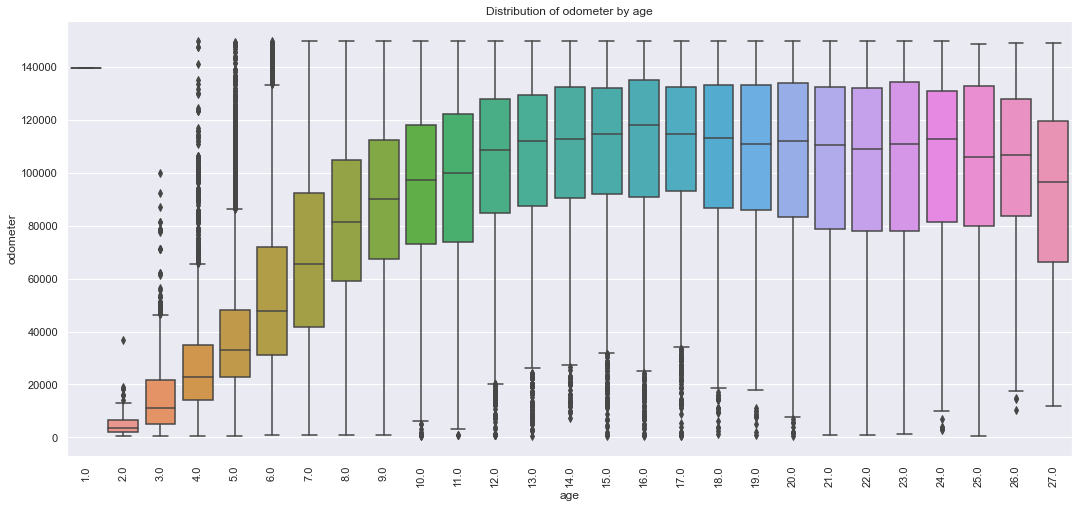

In [137]:
## Plot to show distribution of odometer reading by age
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(data=df_model, x='age', y='odometer').set(title='Distribution of odometer by age')
ax = plt.xticks(rotation=90)
plt.show()

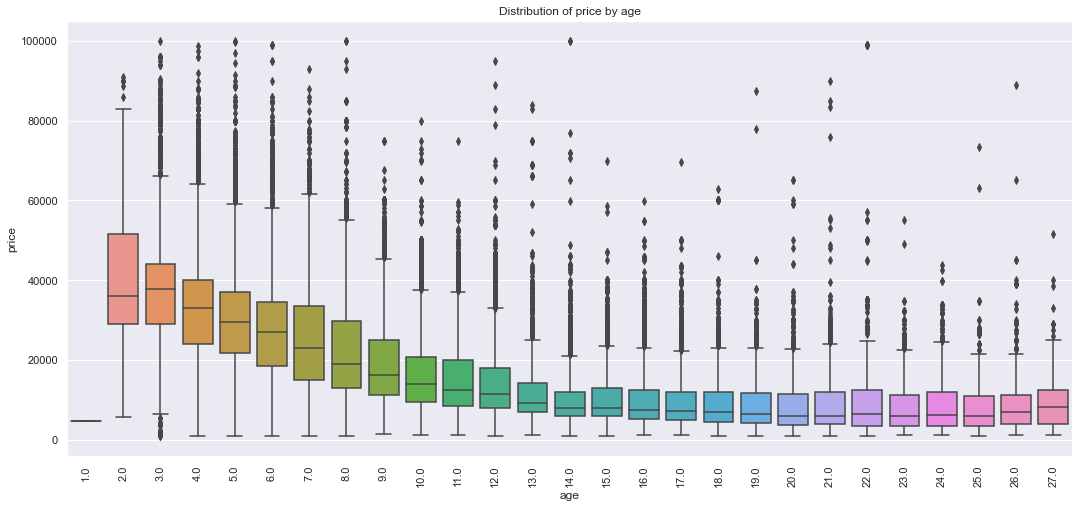

In [138]:
## Plot to show price of car by age
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(data=df_model, x='age', y='price').set(title='Distribution of price by age')
ax = plt.xticks(rotation=90)
plt.show()

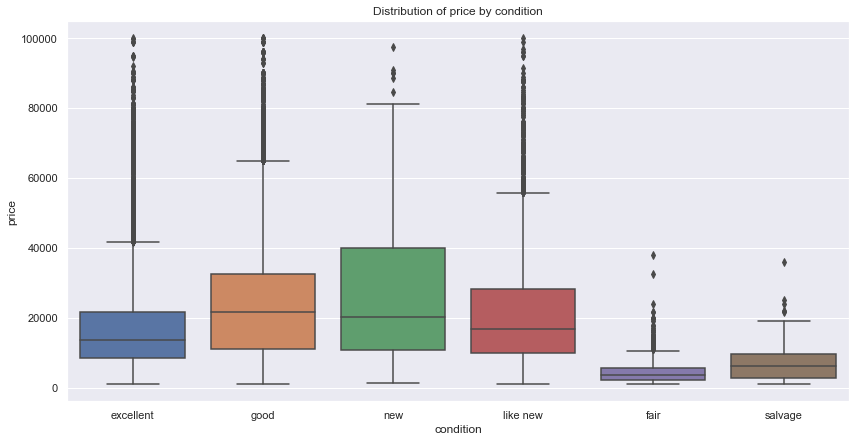

In [140]:
### Verify relation between price and condition category
###
sns.set(rc={'figure.figsize':(14,7)})
sns.boxplot(data=df_model, x='condition', y='price').set(title='Distribution of price by condition')
plt.show()

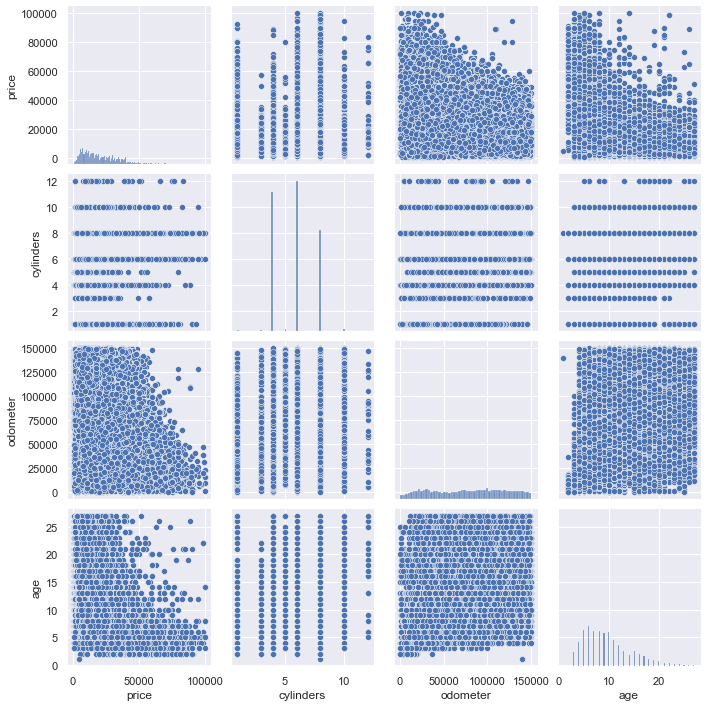

In [142]:
sns.set(rc={'figure.figsize':(20,9)})
sns.pairplot(df_model)
plt.show()

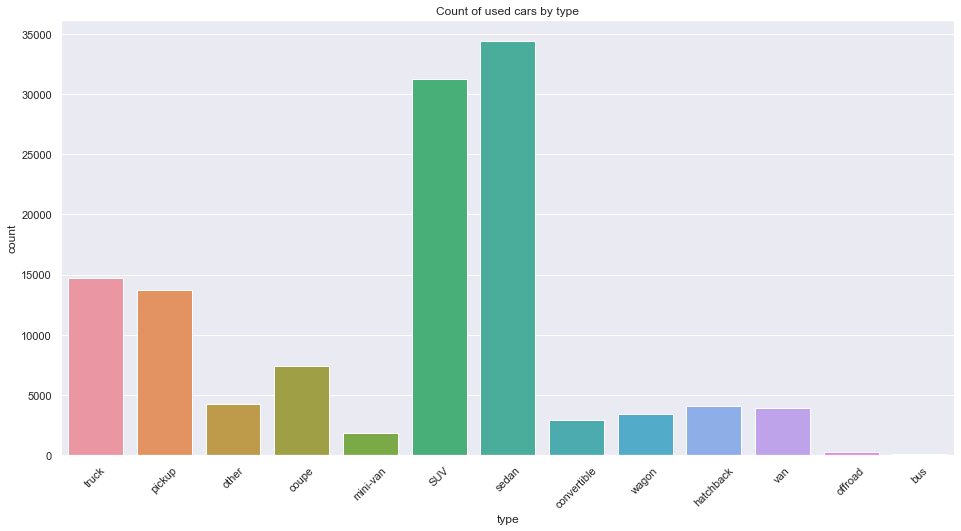

In [143]:
# The above shows that odometer and price are negatively correlated
# Age and price are negatively correlated
# Odometer and age are positively correlated

# Re-checking the count of cars by type for modeling
plt.figure(figsize=(16,8))
plt.title('Count of used cars by type')
sns.countplot(df_model['type'])
plt.xticks(rotation=45);

In [144]:
## Decision made to only create dummy columns for features with minimal unique values. 
df_model2 = pd.get_dummies(df_model,columns = ['fuel', 'transmission', 'drive'])
df_model2 = df_model2.reset_index()
df_model2.info(verbose = True)
df_model2.drop(columns = 'index', inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122323 entries, 0 to 122322
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   122323 non-null  int64  
 1   price                   122323 non-null  int64  
 2   manufacturer            122323 non-null  object 
 3   model                   122323 non-null  object 
 4   condition               122323 non-null  object 
 5   cylinders               122323 non-null  float64
 6   odometer                122323 non-null  float64
 7   title_status            122323 non-null  object 
 8   type                    122323 non-null  object 
 9   paint_color             122323 non-null  object 
 10  age                     122323 non-null  float64
 11  fuel_diesel             122323 non-null  uint8  
 12  fuel_electric           122323 non-null  uint8  
 13  fuel_gas                122323 non-null  uint8  
 14  fuel_hybrid         

In [146]:
# Label encoding columns with many unique values.  This is less than ideal but necessary without far more time and computing power.
from sklearn.preprocessing import LabelEncoder
cols_labeled = ['manufacturer', 'paint_color', 'type']
df_model2[cols_labeled] = df_model2[cols_labeled].apply(LabelEncoder().fit_transform)
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122323 entries, 0 to 122322
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   122323 non-null  int64  
 1   manufacturer            122323 non-null  int64  
 2   model                   122323 non-null  object 
 3   condition               122323 non-null  object 
 4   cylinders               122323 non-null  float64
 5   odometer                122323 non-null  float64
 6   title_status            122323 non-null  object 
 7   type                    122323 non-null  int64  
 8   paint_color             122323 non-null  int64  
 9   age                     122323 non-null  float64
 10  fuel_diesel             122323 non-null  uint8  
 11  fuel_electric           122323 non-null  uint8  
 12  fuel_gas                122323 non-null  uint8  
 13  fuel_hybrid             122323 non-null  uint8  
 14  fuel_other          

In [147]:
# Ordinal Encoding for Condition Feature
condition = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
ordenc = OrdinalEncoder(categories = [condition], dtype = int)
df_model2['condition'] = ordenc.fit_transform(df_model[['condition']])
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122323 entries, 0 to 122322
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   122323 non-null  int64  
 1   manufacturer            122323 non-null  int64  
 2   model                   122323 non-null  object 
 3   condition               122323 non-null  int64  
 4   cylinders               122323 non-null  float64
 5   odometer                122323 non-null  float64
 6   title_status            122323 non-null  object 
 7   type                    122323 non-null  int64  
 8   paint_color             122323 non-null  int64  
 9   age                     122323 non-null  float64
 10  fuel_diesel             122323 non-null  uint8  
 11  fuel_electric           122323 non-null  uint8  
 12  fuel_gas                122323 non-null  uint8  
 13  fuel_hybrid             122323 non-null  uint8  
 14  fuel_other          

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models. Here, you should build a number of different regression models with the price as the target. In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [156]:
#The dataset has now been cleaned with 122323 rows and has 20 features to start modeling

In [185]:
# Start with a simple Linear Regression Model with just 2 features
features = df_model2[['odometer','cylinders', 'age']]
#features = df_model2[['cylinders', 'age']]
price = df_model2['price']
f1 = LinearRegression(fit_intercept = True)
f1.fit(features, price)
linreg_mse = mean_squared_error(f1.predict(features), price)
print(linreg_mse)

71792337.41795011


In [186]:
#The output shows high MSE values
#Checking the correlation of price to all the features
pd.set_option('display.max_rows', 200)
price_corr = df_model2.corrwith(df_model2['price'])
print(price_corr)

price                     1.000000
manufacturer             -0.038283
condition                -0.113918
cylinders                 0.440965
odometer                 -0.556304
type                      0.042622
paint_color               0.059616
age                      -0.555947
fuel_diesel               0.323298
fuel_electric             0.008648
fuel_gas                 -0.315712
fuel_hybrid              -0.043862
fuel_other                0.157481
transmission_automatic   -0.223098
transmission_manual      -0.062907
transmission_other        0.298335
drive_4wd                 0.358403
drive_fwd                -0.440526
drive_rwd                 0.082453
dtype: float64


In [187]:
# Features strongly positively correlated to price - cylinders,fuel_diesel, transmission_other, drive_4wd
# Features strongly negatively correlated to price - odometer,age, fuel_gas, transmission_automatic, drive_fwd
price = df_model2.price
price.head()

0    15000
1    27990
2    34590
3    35000
4    29990
Name: price, dtype: int64

In [ ]:
# CROSS-VALIDATION

In [188]:
#scale the data
object = StandardScaler()
features_scaled = pd.DataFrame(object.fit_transform(features), columns = features.columns)
print(type(features))
print(type(features_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [189]:
# Create testing and training data
X = features_scaled
y = price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)
print(type(X))

#X = df_model.drop('price', axis = 1)
#y = df_model['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

<class 'pandas.core.frame.DataFrame'>


In [190]:
#Simple Linear Regrssion Model
lr = LinearRegression().fit(X_train, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X_train))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test))
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  72103266.90
Test MSE:  71069501.93


In [191]:
print(list(zip(lr.coef_, X)))

[(-4114.9013339425, 'odometer'), (6638.448120150831, 'cylinders'), (-5994.371598722446, 'age')]


In [192]:
# Examining the coefficients
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table.sort_values('Coefs')

,0,Coefs
2,age,-5994.371599
0,odometer,-4114.901334
1,cylinders,6638.448120


In [193]:
r = permutation_importance(lr, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

cylinders  0.465 +/- 0.004
age       0.384 +/- 0.003
odometer  0.182 +/- 0.002


In [222]:
#RIDGE REGRESSION

In [194]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
ridge_train_mse = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test))
print(f'The Ridge training MSE is: {ridge_train_mse}')
print(f'The Ridge testing MSE is: {ridge_test_mse}')
# scores = cross_val_score(ridge_pipeline, X_train, y_train, cv = 5, scoring='neg_root_mean_squared_error')
# print(scores)
# print(f'Mean score of {scores.mean()} with a standard deviation of {scores.std()}')

The Ridge training MSE is: 72103266.90880504
The Ridge testing MSE is: 71069516.63911135


In [195]:
# Using GridSearch to find best alpha
parameters = {'alpha': [0.1, .5, 1, 5, 10]}
gd = GridSearchCV(ridge, parameters)
gd.fit(X_train, y_train)
gd.best_params_

{'alpha': 5}

In [196]:
# Try another Ridge model. 
ridge2 = Ridge()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state =1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(ridge2, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -5933.284
Config: {'alpha': 0.99}


In [197]:
r = permutation_importance(ridge, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

cylinders  0.465 +/- 0.004
age       0.384 +/- 0.003
odometer  0.182 +/- 0.002


In [196]:
# Age and cylinder appear to be the features that provide the most insight into price.

In [198]:
coef_table2 = pd.DataFrame(list(X_train.columns)).copy()
coef_table2.insert(len(coef_table2.columns),"Coefs",ridge.coef_.transpose())
coef_table.sort_values('Coefs')

,0,Coefs
2,age,-5994.371599
0,odometer,-4114.901334
1,cylinders,6638.448120


# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what 
we are able to learn from this. We should review our business objective and explore how well we can provide 
meaningful insight on drivers of used car prices. Your goal now is to distill your findings and determine whether t
he earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

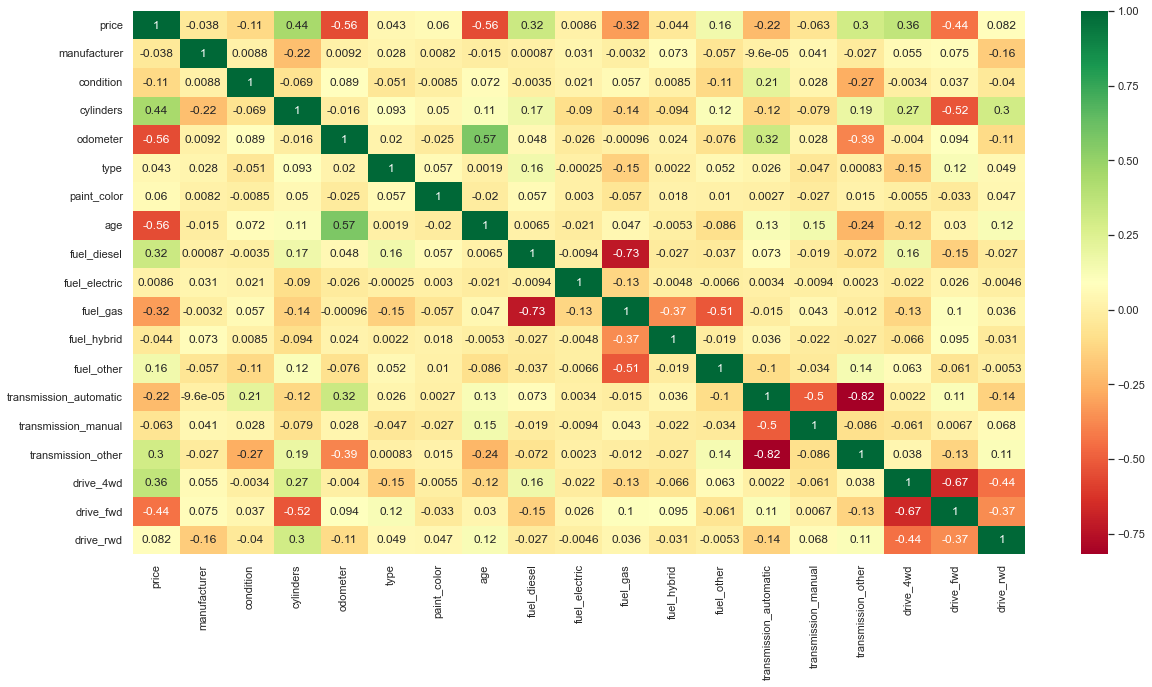

In [209]:
# Re evaluating heat map to show correlation with all the other features
plt.figure(figsize=(20,10))
sns.heatmap(df_model2.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [219]:
# From above correlation matrix it shows that fuel_diesel, transmission_other, drive_4wd are positively correlated
# Also, fuel_gas, transmission_automatic, drive_fwd are negatively correlated
# Linear regression with additional features
addnl_features = df_model2[['fuel_diesel', 'transmission_other', 'drive_4wd']]      
price2 = df_model2.price

In [220]:
# Create testing and training data
X1 = addnl_features
y1 = price2
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=22)

In [221]:
tfd_model = LinearRegression().fit(X1_train, y1_train)
model_1_train_mse = mean_squared_error(y1_train, tfd_model.predict(X1_train))
model_1_test_mse = mean_squared_error(y1_test, tfd_model.predict(X1_test))
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  132815796.87
Test MSE:  136376406.72


In [216]:
# From above correlation matrix it shows that fuel_diesel, transmission_other, drive_4wd are positively correlated
# Also, fuel_gas, transmission_automatic, drive_fwd are negatively correlated
# Linear regression with additional features
addnl_features1 = df_model2[['fuel_gas', 'transmission_automatic', 'drive_fwd']]      
price3 = df_model2.price

In [217]:
# Create testing and training data
X1 = addnl_features1
y1 = price3
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=22)

In [218]:
tfd_model = LinearRegression().fit(X1_train, y1_train)
model_1_train_mse = mean_squared_error(y1_train, tfd_model.predict(X1_train))
model_1_test_mse = mean_squared_error(y1_test, tfd_model.predict(X1_test))
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  131813807.59
Test MSE:  134905798.44


In [ ]:
#The train and test MSE seems to be higher with additional features

#So, odometer, cylinders and age of the vehicle have maximum impact on the price

The above modeling clearly showed that odometer reading, age and number of cylinders had strongest impact on price. Additional features like - automatic_transmission, fuel_gas, drive_fwd which have negative correlation with price seem to have almost similar MSE with fuel_diesel, transmission_other, drive_4wd. While a buyer may prefer automatic transmission or fuel_gas, the data do not provide sufficient confidence on the impact on price for these features. Hence, I would recommend collecting more data that correlated more with price. Since few of the columns lended themselves to one hot encoding it created many columns than was less than ideal for processing and predicting prices. A smaller subset of highly correlated features would have lended better results. Sometimes demand for certain types of vehicles drive the price of cars. However, this dataset does not provide any information of demand except that certain manufacture, size and type of cars have more availability and price variance than others. So, for a more thorough recommendation - additional datasets about customer preference when coming to inquire about used cars when matched with inventpory on hand could help ascertain the cars that would sell and the prices. The dealers can then have those types, size and manufacture available in inventory for which they can demand higher prices leading to higher sales and profit. This would be essential in making suggestions to used car dealers that is limited with the current dataset.

# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client. You should organize your work as a basic report that details your primary findings. Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

(a). The most important factor that determine price of used vehicles is odometer eadings. Price decreases with increasing age and higher odometer readings. There is an inverse relation between vehicle year and odometer. 

(b). The model also indicates that vehicles with higher number of cylinders (that is having higher power), have higher value over economy vehicles with lower power rank lower leading to a decrease in vehicle's resale value. 

(c). Other features that influence car price - fuel, drive and transmission. For example, fuel_diesel, transmission_other, drive_4wd positively influence higher price while fuel_gas, transmission_automatic, drive_fwd could drive down prices (as these are commonly available among most vehicles).

(d). Additional datasets about customer preference and demand when matched with inventory on hand could help ascertain which cars are more likely to sell driving revenue and profit. The dealers can keep track of features like car types, sizes and manufacture that customers demand so that keeping that in inventory will ensure faster sale and profits.

(e). We recommend further examination of the regression model to check for trends by region, make/model of car, car types and color. These features were not used in the regression. 